In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from pprint import pprint

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '144dbb8b1d0d4156bbc4c346b2ec31d2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2026-01-20T07:16:52.868Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 8936}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12519, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12519,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997826e+07,1.997826e+07,False,1.817279e+12,NaN,1,NaN,NaN,None,2026-01-20T07:14:00.000Z,90962.844059,3.471452e+10,3.4060,-0.532407,-1.725286,-1.074525,3.262982,6.500608,-15.541643,1.817279e+12,58.9484,1.910220e+12,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110
1,1027,Ethereum,ETH,ethereum,11421,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206946e+08,1.206946e+08,True,3.762816e+11,NaN,2,NaN,NaN,None,2026-01-20T07:14:00.000Z,3117.635186,2.094939e+10,-16.5414,-1.451017,-2.481856,-0.307261,4.792495,12.294919,-18.893698,3.762816e+11,12.2050,3.762816e+11,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110
2,825,Tether USDt,USDT,tether,167303,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.870030e+11,1.914974e+11,True,1.912834e+11,NaN,3,NaN,NaN,None,2026-01-20T07:14:00.000Z,0.998883,7.980159e+10,-8.4807,-0.030126,-0.057612,-0.000029,-0.074108,0.009496,-0.144630,1.867941e+11,6.0592,1.912834e+11,None,2026-01-20T07:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-20 07:16:54.481110
3,1839,BNB,BNB,bnb,3094,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363610e+08,1.363610e+08,1.363610e+08,False,1.249264e+11,NaN,4,NaN,NaN,None,2026-01-20T07:14:00.000Z,916.144434,2.588527e+09,-3.8172,-0.547550,-0.873054,0.303431,7.857948,7.688338,-14.090011,1.249264e+11,4.0521,1.249264e+11,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110
4,52,XRP,XRP,xrp,1783,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.078950e+10,9.998573e+10,False,1.950265e+11,NaN,5,NaN,NaN,None,2026-01-20T07:14:00.000Z,1.950544,2.796733e+09,-18.1296,-0.438209,-0.185383,-5.171668,1.570830,-0.721561,-18.555934,1.185726e+11,3.8460,1.950544e+11,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110
5,3408,USDC,USDC,usd-coin,36525,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.577397e+10,7.577397e+10,False,7.575277e+10,NaN,6,6.090122e+10,6.088418e+10,None,2026-01-20T07:14:00.000Z,0.999720,1.343422e+10,18.1094,0.003028,-0.011304,-0.004948,-0.013263,-0.005209,-0.002034,7.575277e+10,2.4571,7.575277e+10,None,2026-01-20T07:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-20 07:16:54.481110
6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.655839e+08,6.186357e+08,True,8.129306e+10,NaN,7,5.252369e+08,6.901981e+10,None,2026-01-20T07:14:00.000Z,131.407004,3.353669e+09,-33.2118,-0.875989,-1.353391,-6.336293,4.837016,0.640718,-28.455579,7.432168e+10,2.4108,8.129306e+10,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110
7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.471004e+10,9.471004e+10,True,2.946548e+10,NaN,8,9.466789e+10,2.945237e+10,None,2026-01-20T07:14:00.000Z,0.311113,6.642216e+08,-12.2898,-0.471131,-2.108773,4.144969,10.061584,10.785180,-3.578482,2.946548e+10,0.9558,2.946548e+10,None,2026-0

In [34]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '144dbb8b1d0d4156bbc4c346b2ec31d2',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    # if not os.path.isfile(r'/content/drive/MyDrive/Web scrapping/API.csv'):
    #     df.to_csv(r'/content/drive/MyDrive/Web scrapping/API.csv', index=False)
    # else:
    #     df.to_csv(r'/content/drive/MyDrive/Web scrapping/API.csv', mode='a', header=False, index=False)



In [14]:
import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [16]:
# df72 = pd.read_csv(r'/content/drive/MyDrive/Web scrapping/API.csv')
# df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12519,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.997826e+07,1.997826e+07,False,1.817279e+12,NaN,1,NaN,NaN,NaN,2026-01-20T07:14:00.000Z,90962.844059,3.471452e+10,3.4060,-0.532407,-1.725286,-1.074525,3.262982,6.500608,-15.541643,1.817279e+12,58.9484,1.910220e+12,NaN,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaN
1,1027,Ethereum,ETH,ethereum,11421,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206946e+08,1.206946e+08,True,3.762816e+11,NaN,2,NaN,NaN,NaN,2026-01-20T07:14:00.000Z,3117.635186,2.094939e+10,-16.5414,-1.451017,-2.481856,-0.307261,4.792495,12.294919,-18.893698,3.762816e+11,12.2050,3.762816e+11,NaN,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaN
2,825,Tether USDt,USDT,tether,167303,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.870030e+11,1.914974e+11,True,1.912834e+11,NaN,3,NaN,NaN,NaN,2026-01-20T07:14:00.000Z,0.998883,7.980159e+10,-8.4807,-0.030126,-0.057612,-0.000029,-0.074108,0.009496,-0.144630,1.867941e+11,6.0592,1.912834e+11,NaN,2026-01-20T07:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-20 07:16:54.481110,NaN
3,1839,BNB,BNB,bnb,3094,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363610e+08,1.363610e+08,1.363610e+08,False,1.249264e+11,NaN,4,NaN,NaN,NaN,2026-01-20T07:14:00.000Z,916.144434,2.588527e+09,-3.8172,-0.547550,-0.873054,0.303431,7.857948,7.688338,-14.090011,1.249264e+11,4.0521,1.249264e+11,NaN,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaN
4,52,XRP,XRP,xrp,1783,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.078950e+10,9.998573e+10,False,1.950265e+11,NaN,5,NaN,NaN,NaN,2026-01-20T07:14:00.000Z,1.950544,2.796733e+09,-18.1296,-0.438209,-0.185383,-5.171668,1.570830,-0.721561,-18.555934,1.185726e+11,3.8460,1.950544e+11,NaN,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaN
5,3408,USDC,USDC,usd-coin,36525,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.577397e+10,7.577397e+10,False,7.575277e+10,NaN,6,6.090122e+10,6.088418e+10,NaN,2026-01-20T07:14:00.000Z,0.999720,1.343422e+10,18.1094,0.003028,-0.011304,-0.004948,-0.013263,-0.005209,-0.002034,7.575277e+10,2.4571,7.575277e+10,NaN,2026-01-20T07:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-20 07:16:54.481110,NaN
6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.655839e+08,6.186357e+08,True,8.129306e+10,NaN,7,5.252369e+08,6.901981e+10,NaN,2026-01-20T07:14:00.000Z,131.407004,3.353669e+09,-33.2118,-0.875989,-1.353391,-6.336293,4.837016,0.640718,-28.455579,7.432168e+10,2.4108,8.129306e+10,NaN,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaN
7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.471004e+10,9.471004e+10,True,2.946548e+10,NaN,8,9.466789e+10,2.945237e+10,NaN,2026-01-20T07:14:00.000Z,0.311113,6.642216e+08,-12.2898,-0.471131,-2.108773,4.144969,10.061584,10.785180,-3.578482,2.946548e+10,0.9558,2

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12519,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997826e+07,1.997826e+07,False,1.817279e+12,NaN,1,NaN,NaN,None,2026-01-20T07:14:00.000Z,90962.844059,3.471452e+10,3.4060,-0.532407,-1.725286,-1.074525,3.262982,6.500608,-15.541643,1.817279e+12,58.9484,1.910220e+12,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
1,1027,Ethereum,ETH,ethereum,11421,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206946e+08,1.206946e+08,True,3.762816e+11,NaN,2,NaN,NaN,None,2026-01-20T07:14:00.000Z,3117.635186,2.094939e+10,-16.5414,-1.451017,-2.481856,-0.307261,4.792495,12.294919,-18.893698,3.762816e+11,12.2050,3.762816e+11,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
2,825,Tether USDt,USDT,tether,167303,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.870030e+11,1.914974e+11,True,1.912834e+11,NaN,3,NaN,NaN,None,2026-01-20T07:14:00.000Z,0.998883,7.980159e+10,-8.4807,-0.030126,-0.057612,-0.000029,-0.074108,0.009496,-0.144630,1.867941e+11,6.0592,1.912834e+11,None,2026-01-20T07:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-20 07:16:54.481110,NaT
3,1839,BNB,BNB,bnb,3094,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363610e+08,1.363610e+08,1.363610e+08,False,1.249264e+11,NaN,4,NaN,NaN,None,2026-01-20T07:14:00.000Z,916.144434,2.588527e+09,-3.8172,-0.547550,-0.873054,0.303431,7.857948,7.688338,-14.090011,1.249264e+11,4.0521,1.249264e+11,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
4,52,XRP,XRP,xrp,1783,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.078950e+10,9.998573e+10,False,1.950265e+11,NaN,5,NaN,NaN,None,2026-01-20T07:14:00.000Z,1.950544,2.796733e+09,-18.1296,-0.438209,-0.185383,-5.171668,1.570830,-0.721561,-18.555934,1.185726e+11,3.8460,1.950544e+11,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
5,3408,USDC,USDC,usd-coin,36525,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.577397e+10,7.577397e+10,False,7.575277e+10,NaN,6,6.090122e+10,6.088418e+10,None,2026-01-20T07:14:00.000Z,0.999720,1.343422e+10,18.1094,0.003028,-0.011304,-0.004948,-0.013263,-0.005209,-0.002034,7.575277e+10,2.4571,7.575277e+10,None,2026-01-20T07:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-20 07:16:54.481110,NaT
6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.655839e+08,6.186357e+08,True,8.129306e+10,NaN,7,5.252369e+08,6.901981e+10,None,2026-01-20T07:14:00.000Z,131.407004,3.353669e+09,-33.2118,-0.875989,-1.353391,-6.336293,4.837016,0.640718,-28.455579,7.432168e+10,2.4108,8.129306e+10,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.471004e+10,9.471004e+10,True,2.946548e+10,NaN,8,9.466789e+10,2.945237e+10,None,2026-01-20T07:14:00.000Z,0.311113,6.642216e+08,-12.2898,-0.471131,-2.108773,4.144969,10.061584,10.785180,-3.578482,2.9465

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12519,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19978256.00000,19978256.00000,False,1817278985094.09009,NaN,1,NaN,NaN,None,2026-01-20T07:14:00.000Z,90962.84406,34714522040.34443,3.40600,-0.53241,-1.72529,-1.07453,3.26298,6.50061,-15.54164,1817278985094.09448,58.94840,1910219725234.07007,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
1,1027,Ethereum,ETH,ethereum,11421,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694565.18495,120694565.18495,True,376281623136.37000,NaN,2,NaN,NaN,None,2026-01-20T07:14:00.000Z,3117.63519,20949389497.24076,-16.54140,-1.45102,-2.48186,-0.30726,4.79249,12.29492,-18.89370,376281623136.37384,12.20500,376281623136.37000,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
2,825,Tether USDt,USDT,tether,167303,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,187003037226.89313,191497369719.29819,True,191283401570.57999,NaN,3,NaN,NaN,None,2026-01-20T07:14:00.000Z,0.99888,79801594993.61348,-8.48070,-0.03013,-0.05761,-0.00003,-0.07411,0.00950,-0.14463,186794090786.85587,6.05920,191283401570.57999,None,2026-01-20T07:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-20 07:16:54.481110,NaT
3,1839,BNB,BNB,bnb,3094,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136361013.04000,136361013.04000,136361013.04000,False,124926383094.42999,NaN,4,NaN,NaN,None,2026-01-20T07:14:00.000Z,916.14443,2588527273.33726,-3.81720,-0.54755,-0.87305,0.30343,7.85795,7.68834,-14.09001,124926383094.43007,4.05210,124926383094.42999,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
4,52,XRP,XRP,xrp,1783,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60789498738.00000,99985727631.00000,False,195026546085.19000,NaN,5,NaN,NaN,None,2026-01-20T07:14:00.000Z,1.95054,2796732969.68569,-18.12960,-0.43821,-0.18538,-5.17167,1.57083,-0.72156,-18.55593,118572582887.78334,3.84600,195054384966.76001,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
5,3408,USDC,USDC,usd-coin,36525,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,75773972950.98817,75773972950.98817,False,75752768514.92000,NaN,6,60901219650.23000,60884177175.50956,None,2026-01-20T07:14:00.000Z,0.99972,13434220558.71349,18.10940,0.00303,-0.01130,-0.00495,-0.01326,-0.00521,-0.00203,75752768514.92102,2.45710,75752768514.92000,None,2026-01-20T07:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-20 07:16:54.481110,NaT
6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,565583885.64465,618635706.97057,True,81293064845.96001,NaN,7,525236893.30000,69019806560.49844,None,2026-01-20T07:14:00.000Z,131.40700,3353669033.54786,-33.21180,-0.87599,-1.35339,-6.33629,4.83702,0.64072,-28.45558,74321683946.58537,2.41080,81293064845.96001,None,2026-01-20T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-20 07:16:54.481110,NaT
7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf

In [21]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                      'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.10440,-2.08870,-1.10876,3.03161,8.31557,-15.96383
Ethereum,-0.52788,-3.08900,-0.60982,4.15756,13.93325,-19.50228
Tether USDt,-0.00907,-0.05781,-0.00226,-0.06971,0.03432,-0.15384
BNB,-0.32339,-1.30314,0.41975,7.33944,9.75001,-14.59094
XRP,-0.56707,-1.38694,-5.78094,0.54416,0.34661,-19.30180
USDC,-0.00004,-0.00894,-0.01015,-0.00845,0.01255,-0.01584
Solana,-1.08652,-2.71000,-7.56631,3.62294,1.58001,-29.67970
TRON,-1.01401,-3.13066,2.68152,8.17505,10.89129,-5.06225
Dogecoin,-0.48467,-0.80489,-9.10131,-4.12149,-10.45858,-34.03487


In [22]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.10440
              quote.USD.percent_change_24h    -2.08870
              quote.USD.percent_change_7d     -1.10876
              quote.USD.percent_change_30d     3.03161
              quote.USD.percent_change_60d     8.31557
              quote.USD.percent_change_90d   -15.96383
Ethereum      quote.USD.percent_change_1h     -0.52788
              quote.USD.percent_change_24h    -3.08900
              quote.USD.percent_change_7d     -0.60982
              quote.USD.percent_change_30d     4.15756
              quote.USD.percent_change_60d    13.93325
              quote.USD.percent_change_90d   -19.50228
Tether USDt   quote.USD.percent_change_1h     -0.00907
              quote.USD.percent_change_24h    -0.05781
              quote.USD.percent_change_7d     -0.00226
              quote.USD.percent_change_30d    -0.06971
              quote.USD.percent_change_60d     0.03432
              quote.USD.percent_change_90d    -0.15384
BNB           quote.USD.percent_change_1h     -0.32339
              quote.USD.percent_change_24h    -1.30314
              quote.USD.percent_change_7d      0.41975
              quote.USD.percent_change_30d     7.33944
              quote.USD.percent_change_60d     9.75001
              quote.USD.percent_change_90d   -14.59094
XRP           quote.USD.percent_change_1h     -0.56707
              quote.USD.percent_change_24h    -1.38694
              quote.USD.percent_change_7d     -5.78094
              quote.USD.percent_change_30d     0.54416
              quote.USD.percent_change_60d     0.34661
              quote.USD.percent_change_90d   -19.30180
USDC          quote.USD.percent_change_1h     -0.00004
              quote.USD.percent_change_24h    -0.00894
              quote.USD.percent_change_7d     -0.01015
              quote.USD.percent_change_30d    -0.00845
              quote.USD.percent_change_60d     0.01255
              quote.USD.percent_change_90d    -0.01584
Solana        quote.USD.percent_change_1h     -1.08652
              quote.USD.percent_change_24h    -2.71000
              quote.USD.percent_change_7d     -7.56631
              quote.USD.percent_change_30d     3.62294
              quote.USD.percent_change_60d     1.58001
              quote.USD.percent_change_90d   -29.67970
TRON          quote.USD.percent_change_1h     -1.01401
              quote.USD.percent_change_24h    -3.13066
              quote.USD.percent_change_7d      2.68152
              quote.USD.percent_change_30d     8.17505
              quote.USD.percent_change_60d    10.89129
              quote.USD.percent_change_90d    -5.06225
Dogecoin      quote.USD.percent_change_1h     -0.48467
              quote.USD.percent_change_24h    -0.80489
              quote.USD.percent_change_7d     -9.10131
              quote.USD.percent_change_30d    -4.12149
              quote.USD.percent_change_60d   -10.45858
              quote.USD.percent_change_90d   -34.03487
Cardano       quote.USD.percent_change_1h     -0.87636
              quote.USD.percent_change_24h    -0.52571
              quote.USD.percent_change_7d     -7.08448
              quote.USD.percent_change_30d    -1.49853
              quote.USD.percent_change_60d   -11.75952
              quote.USD.percent_change_90d   -42.90358
Bitcoin Cash  quote.USD.percent_change_1h      0.03427
              quote.USD.percent_change_24h    -1.92655
              quote.USD.percent_change_7d     -5.17473
              quote.USD.percent_change_30d    -1.80489
              quote.USD.percent_change_60d    24.06147
              quote.USD.percent_change_90d    21.02303
Monero        quote.USD.percent_change_1h     -1.55174
              quote.USD.percent_change_24h    -8.48604
              quote.USD.percent_change_7d    -12.02545
              quote.USD.percent_change_30d    26.07657
              quote.USD.percent_change_60d    77.51734
              quote.USD.percent_change_90d    87.997

In [23]:
type(df4)

pandas.core.series.Series

In [24]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.10440
             quote.USD.percent_change_24h  -2.08870
             quote.USD.percent_change_7d   -1.10876
             quote.USD.percent_change_30d   3.03161
             quote.USD.percent_change_60d   8.31557
             quote.USD.percent_change_90d -15.96383
Ethereum     quote.USD.percent_change_1h   -0.52788
             quote.USD.percent_change_24h  -3.08900
             quote.USD.percent_change_7d   -0.60982
             quote.USD.percent_change_30d   4.15756
             quote.USD.percent_change_60d  13.93325
             quote.USD.percent_change_90d -19.50228
Tether USDt  quote.USD.percent_change_1h   -0.00907
             quote.USD.percent_change_24h  -0.05781
             quote.USD.percent_change_7d   -0.00226
             quote.USD.percent_change_30d  -0.06971
             quote.USD.percent_change_60d   0.03432
             quote.USD.percent_change_90d  -0.15384
BNB          quote.USD.percent_change_1h   -0.32339
             quote.USD.percent_change_24h  -1.30314
             quote.USD.percent_change_7d    0.41975
             quote.USD.percent_change_30d   7.33944
             quote.USD.percent_change_60d   9.75001
             quote.USD.percent_change_90d -14.59094
XRP          quote.USD.percent_change_1h   -0.56707
             quote.USD.percent_change_24h  -1.38694
             quote.USD.percent_change_7d   -5.78094
             quote.USD.percent_change_30d   0.54416
             quote.USD.percent_change_60d   0.34661
             quote.USD.percent_change_90d -19.30180
USDC         quote.USD.percent_change_1h   -0.00004
             quote.USD.percent_change_24h  -0.00894
             quote.USD.percent_change_7d   -0.01015
             quote.USD.percent_change_30d  -0.00845
             quote.USD.percent_change_60d   0.01255
             quote.USD.percent_change_90d  -0.01584
Solana       quote.USD.percent_change_1h   -1.08652
             quote.USD.percent_change_24h  -2.71000
             quote.USD.percent_change_7d   -7.56631
             quote.USD.percent_change_30d   3.62294
             quote.USD.percent_change_60d   1.58001
             quote.USD.percent_change_90d -29.67970
TRON         quote.USD.percent_change_1h   -1.01401
             quote.USD.percent_change_24h  -3.13066
             quote.USD.percent_change_7d    2.68152
             quote.USD.percent_change_30d   8.17505
             quote.USD.percent_change_60d  10.89129
             quote.USD.percent_change_90d  -5.06225
Dogecoin     quote.USD.percent_change_1h   -0.48467
             quote.USD.percent_change_24h  -0.80489
             quote.USD.percent_change_7d   -9.10131
             quote.USD.percent_change_30d  -4.12149
             quote.USD.percent_change_60d -10.45858
             quote.USD.percent_change_90d -34.03487
Cardano      quote.USD.percent_change_1h   -0.87636
             quote.USD.percent_change_24h  -0.52571
             quote.USD.percent_change_7d   -7.08448
             quote.USD.percent_change_30d  -1.49853
             quote.USD.percent_change_60d -11.75952
             quote.USD.percent_change_90d -42.90358
Bitcoin Cash quote.USD.percent_change_1h    0.03427
             quote.USD.percent_change_24h  -1.92655
             quote.USD.percent_change_7d   -5.17473
             quote.USD.percent_change_30d  -1.80489
             quote.USD.percent_change_60d  24.06147
             quote.USD.percent_change_90d  21.02303
Monero       quote.USD.percent_change_1h   -1.55174
             quote.USD.percent_change_24h  -8.48604
             quote.USD.percent_change_7d  -12.02545
             quote.USD.percent_change_30d  26.07657
             quote.USD.percent_change_60d  77.51734
             quote.USD.percent_change_90d  87.99725
Chainlink    quote.USD.percent_change_1h   -0.61273
             quote.USD.percent_change_24h  -1.63222
             quote.USD.percent_change_7d   -4.81350
             quote.USD.percent_change_30d

In [25]:
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10440
1,Bitcoin,quote.USD.percent_change_24h,-2.08870
2,Bitcoin,quote.USD.percent_change_7d,-1.10876
3,Bitcoin,quote.USD.percent_change_30d,3.03161
4,Bitcoin,quote.USD.percent_change_60d,8.31557
5,Bitcoin,quote.USD.percent_change_90d,-15.96383
6,Ethereum,quote.USD.percent_change_1h,-0.52788
7,Ethereum,quote.USD.percent_change_24h,-3.08900
8,Ethereum,quote.USD.percent_change_7d,-0.60982
9,Ethereum,quote.USD.percent_change_30d,4.15756


In [26]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10440
1,Bitcoin,quote.USD.percent_change_24h,-2.08870
2,Bitcoin,quote.USD.percent_change_7d,-1.10876
3,Bitcoin,quote.USD.percent_change_30d,3.03161
4,Bitcoin,quote.USD.percent_change_60d,8.31557
5,Bitcoin,quote.USD.percent_change_90d,-15.96383
6,Ethereum,quote.USD.percent_change_1h,-0.52788
7,Ethereum,quote.USD.percent_change_24h,-3.08900
8,Ethereum,quote.USD.percent_change_7d,-0.60982
9,Ethereum,quote.USD.percent_change_30d,4.15756


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                        ['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.10440
1,Bitcoin,24h,-2.08870
2,Bitcoin,7d,-1.10876
3,Bitcoin,30d,3.03161
4,Bitcoin,60d,8.31557
5,Bitcoin,90d,-15.96383
6,Ethereum,1h,-0.52788
7,Ethereum,24h,-3.08900
8,Ethereum,7d,-0.60982
9,Ethereum,30d,4.15756


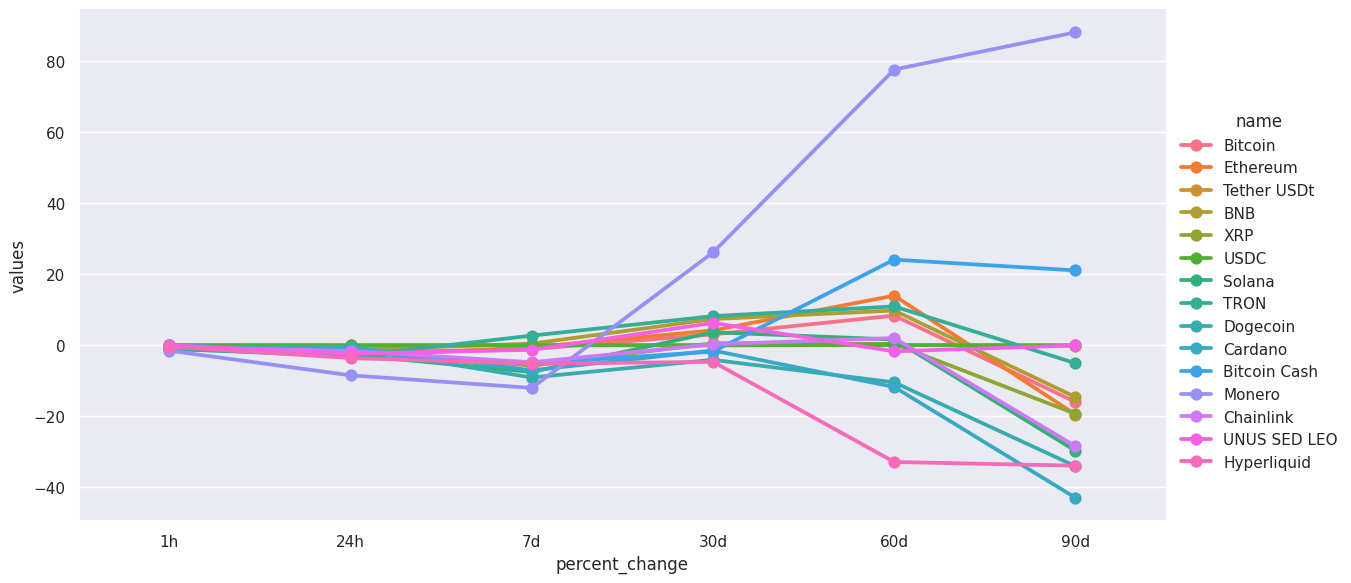

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point',height=6, aspect=2)

In [37]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,90962.84406,NaT
15,Bitcoin,91046.37341,2026-01-20 08:04:48.031187
30,Bitcoin,91046.37341,2026-01-20 08:05:37.883349
45,Bitcoin,90996.60616,2026-01-20 08:06:37.954203
60,Bitcoin,90996.58665,2026-01-20 08:07:38.273736
75,Bitcoin,90788.94915,2026-01-20 08:51:38.577010
90,Bitcoin,90788.94915,2026-01-20 08:52:38.706864
105,Bitcoin,90897.68270,2026-01-20 08:53:38.790096


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

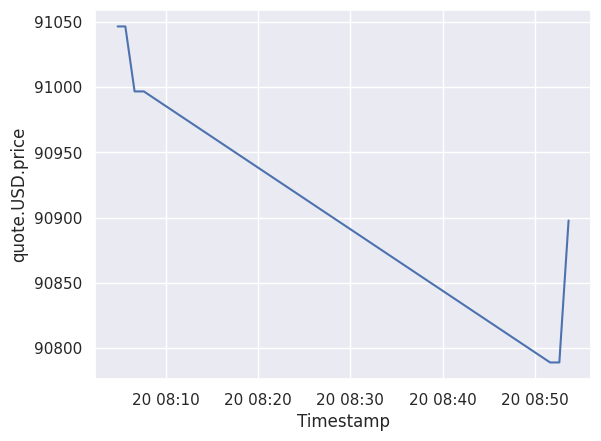

In [39]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)